In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")

In [3]:
## getting see the datas

df.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [4]:
## knowing about the shape for features and columns

## we have 614 records and 10 features


df.shape

(614, 10)

In [5]:
# this describe about mean std and min max and percentages values for all numerical values

#in our data sets we dont have any categorical data sets

df.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [6]:
## I already said that no categorical values so we can clearly see that no categorical values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


# okay  we can clearly see than only numerical values are there no categorical and easy to clean and train

## Lets check Nan values

In [7]:
## another thing we should always check missing values and here we dont have any missing values

nan=df.isnull().sum()

In [8]:
nan

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

## no nan values also so that our data is clean


## lets check outliers and std


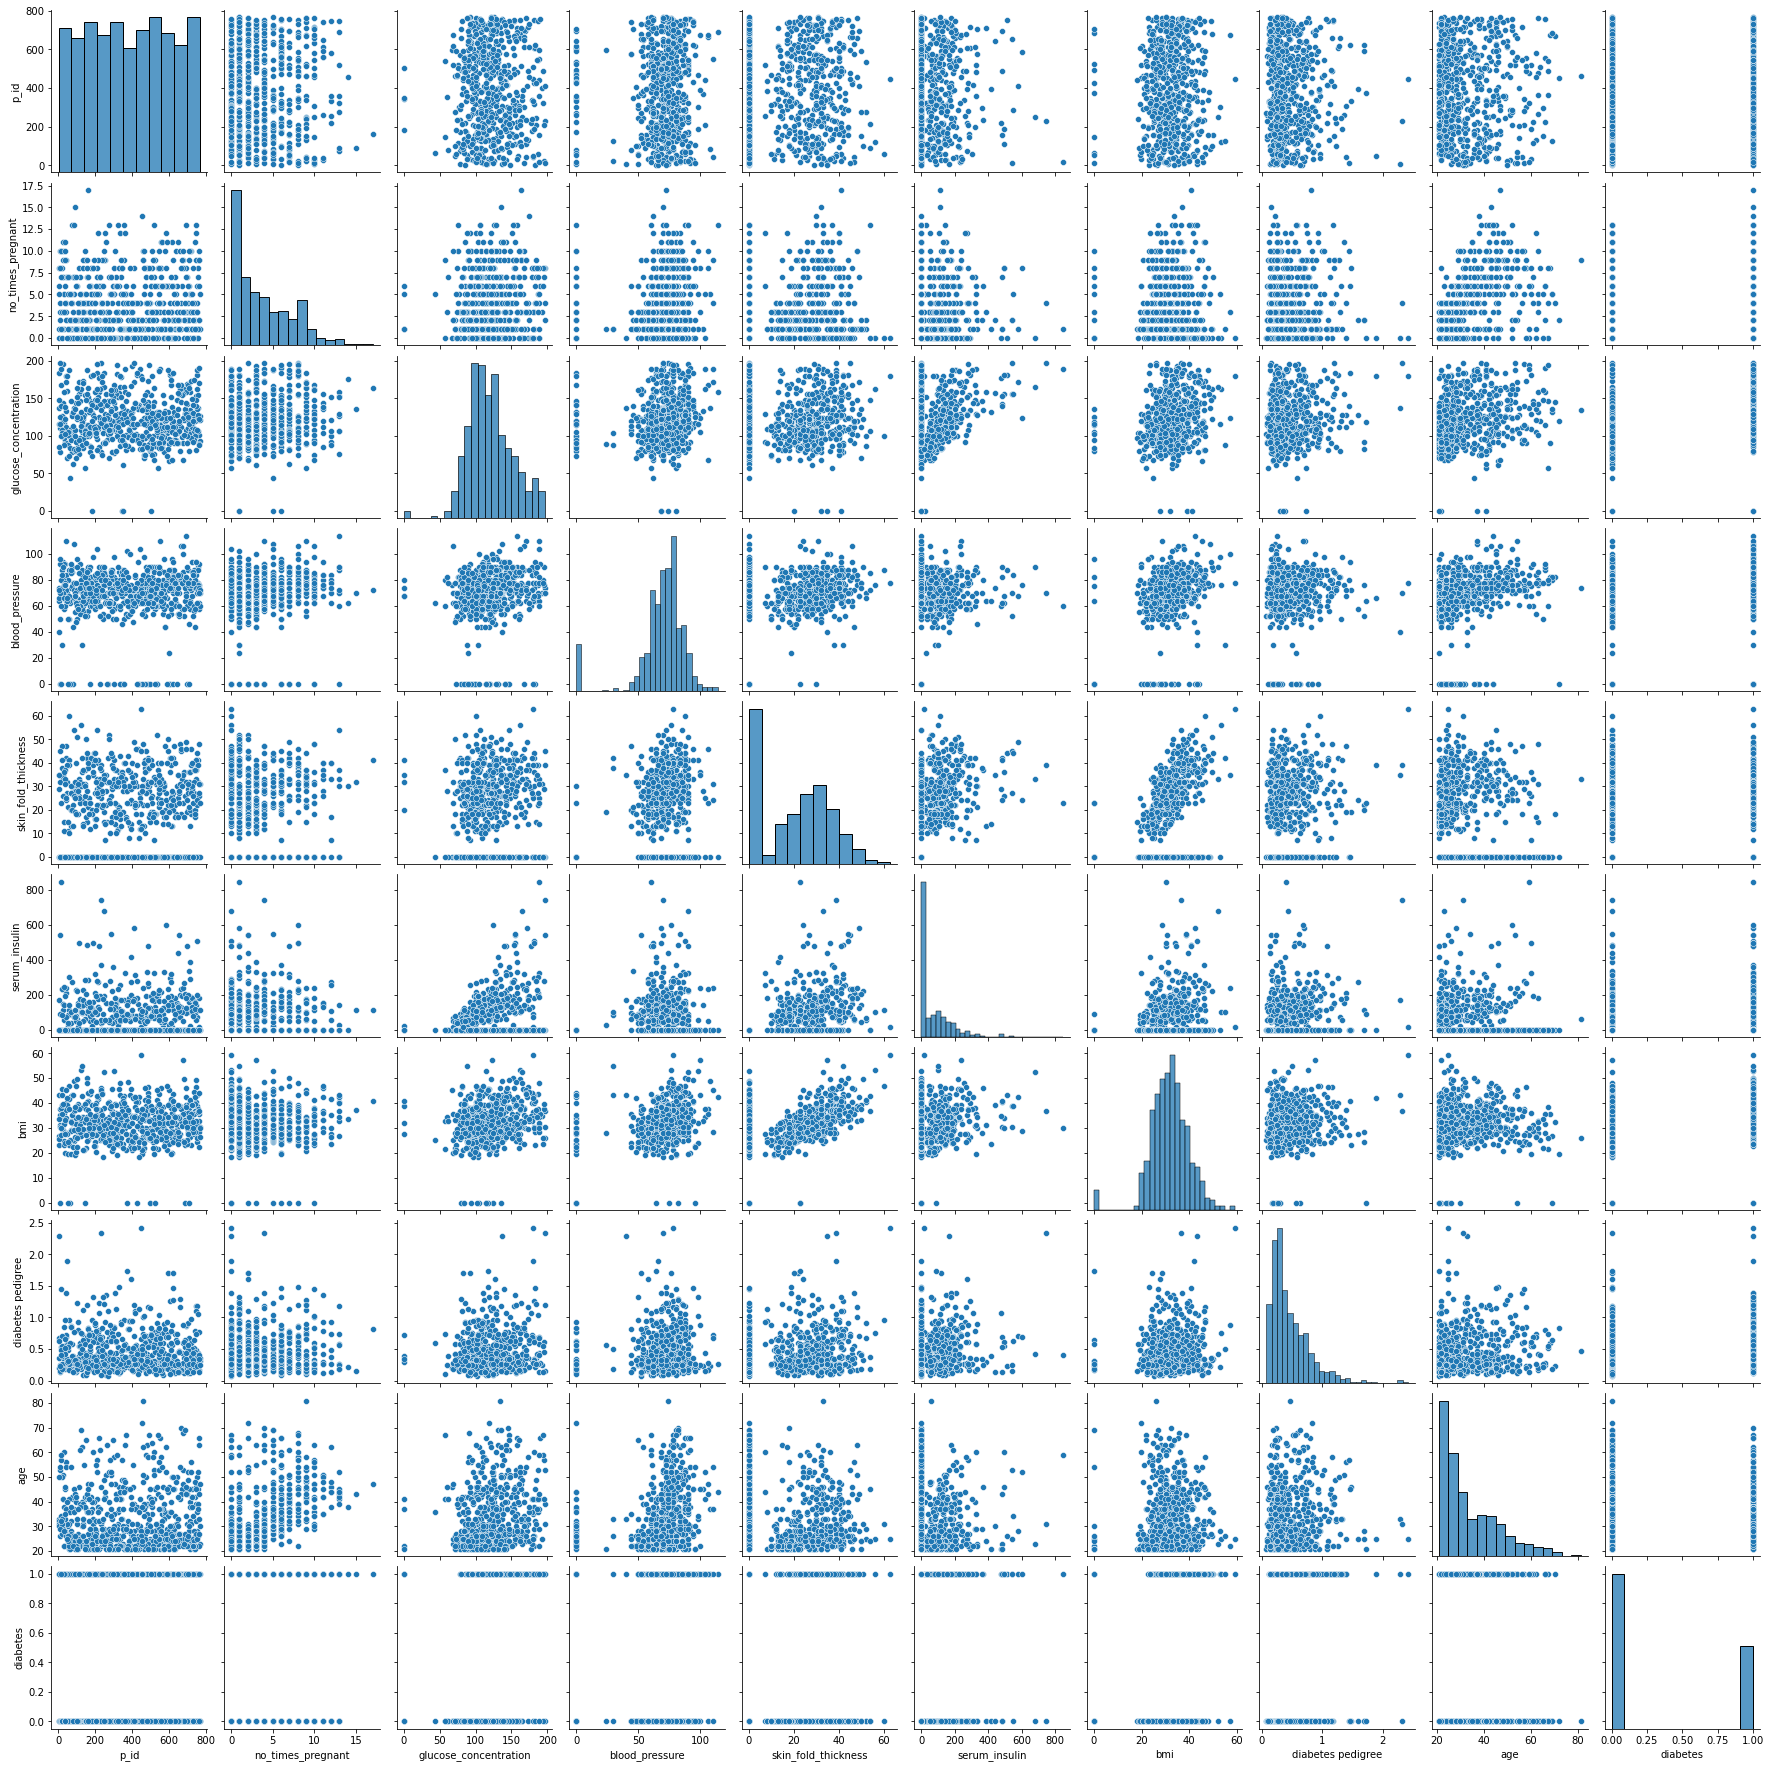

In [9]:
#here we done pair plot we can see data standard normal distrubution


sns.pairplot(df)


# lets see corr

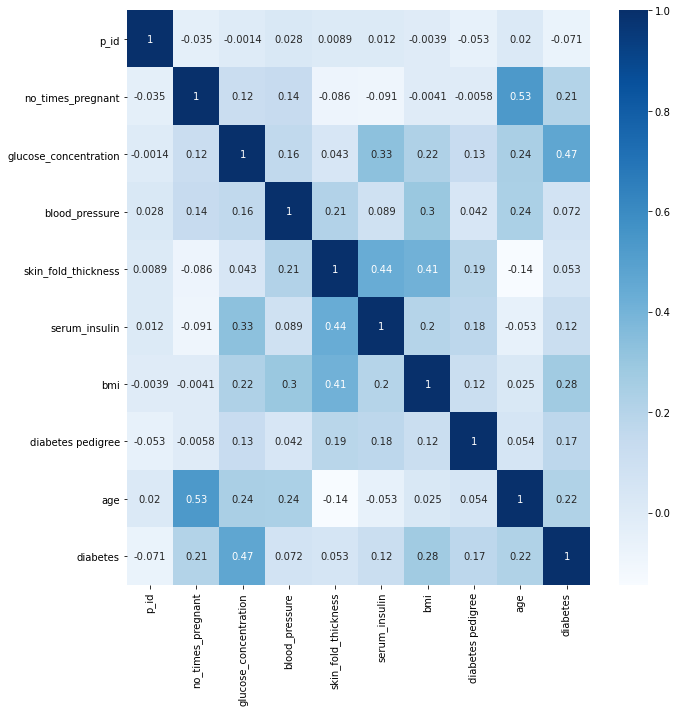

In [10]:
# Correaltion is more important to take care because giving correalated features to model will perfom overfitting in
# some data so it should be identified and avoided but in our case all data are different and not that much 
# correalted so no need to do 

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.tight_layout()

In [11]:
# we know that column name : p_id is not realted to diabeties so we always avoid those kind of features these thing will 
# over fit the data

df=df.drop(columns='p_id',axis=1)

In [12]:
# okay most of the data are unique we dont need to drop any data :P
def print_columns(data):
    for col in data.columns:
        print(col)
       

In [13]:
print_columns(df)

no_times_pregnant
glucose_concentration
blood_pressure
skin_fold_thickness
serum_insulin
bmi
diabetes pedigree
age
diabetes


In [14]:
## here we create one small function to plot boxplot for clean outliers

def boxplots_before(data,col):

        sns.boxplot(data[col])
       
        
    
    
    

In [15]:
# here also same thing in did created function to clean upper bound values and lower bound values

def remove_outliers(data,col):
    
        upper_bound=df[col].mean() + 3*df[col].std()
        lower_bound=df[col].mean() - 3*df[col].std()
        data.loc[data[col] >=upper_bound , col]=upper_bound
        data.loc[data[col] <=lower_bound , col]=lower_bound
        
        sns.boxplot(data[col])
        
    

## usually getting pregant are not more than 5 but there is a chance in twins so we can say till 12 birth are possible
## so we should severly care about outliers here

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


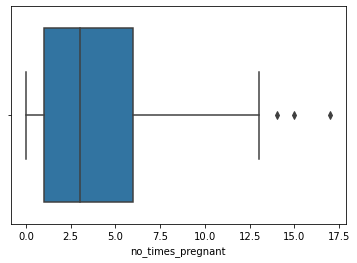

In [16]:
#

boxplots_before(df,'no_times_pregnant')

## above box plot is before removing outliers 
## below box plot is after perfoming outliers

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


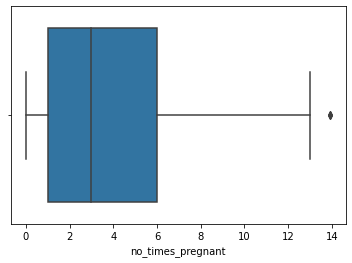

In [17]:
remove_outliers(df,'no_times_pregnant')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


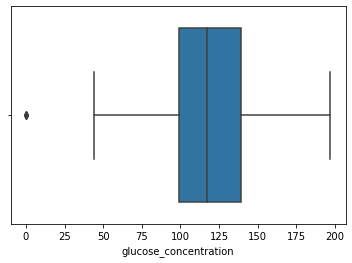

In [18]:
boxplots_before(df,'glucose_concentration')

## above box plot is before removing outliers 
## below box plot is after perfoming outliers

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


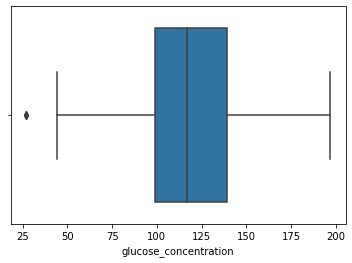

In [19]:
remove_outliers(df,'glucose_concentration')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


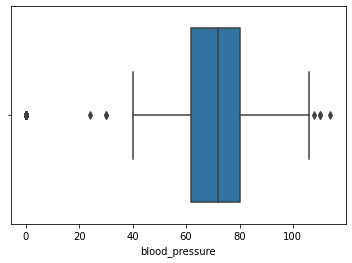

In [20]:
boxplots_before(df,'blood_pressure')

## above box plot is before removing outliers 
## below box plot is after perfoming outliers

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


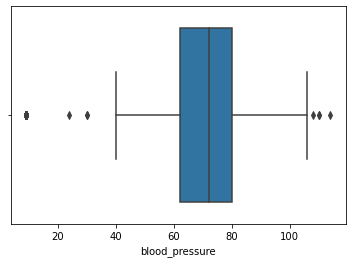

In [21]:
remove_outliers(df,'blood_pressure')

## above box plot is before removing outliers 
## below box plot is after perfoming outliers

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


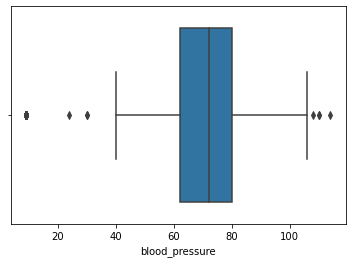

In [22]:
boxplots_before(df,'blood_pressure')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


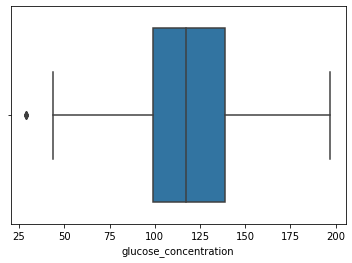

In [23]:
remove_outliers(df,'glucose_concentration')

## above box plot is before removing outliers 
## below box plot is after perfoming outliers

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


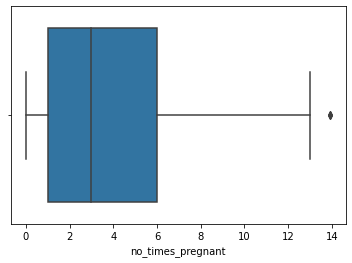

In [24]:
boxplots_before(df,'no_times_pregnant')

## above box plot is before removing outliers 
## below box plot is after perfoming outliers

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


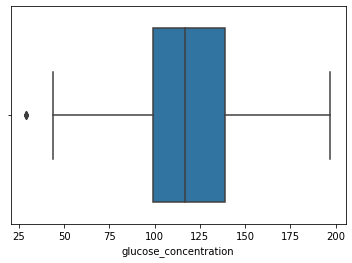

In [25]:
remove_outliers(df,'glucose_concentration')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


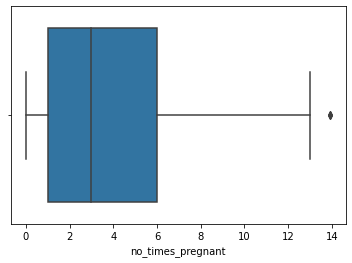

In [26]:
boxplots_before(df,'no_times_pregnant')

## above box plot is before removing outliers 
## below box plot is after perfoming outliers

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


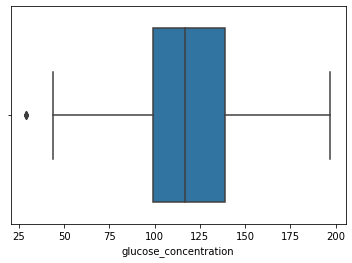

In [27]:
remove_outliers(df,'glucose_concentration')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


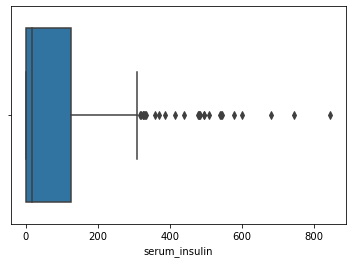

In [28]:
boxplots_before(df,'serum_insulin')

## above box plot is before removing outliers 
## below box plot is after perfoming outliers

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


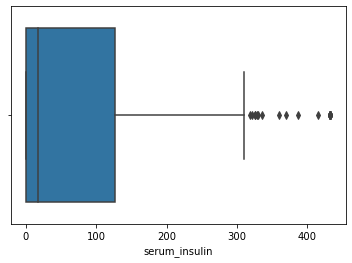

In [29]:
remove_outliers(df,'serum_insulin')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


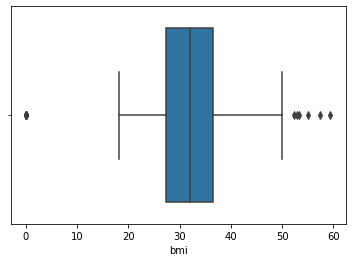

In [30]:
boxplots_before(df,'bmi')

## above box plot is before removing outliers 
## below box plot is after perfoming outliers

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


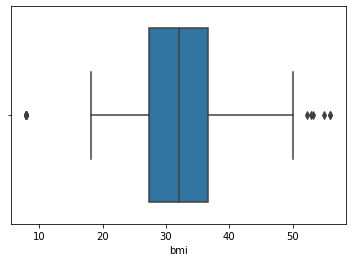

In [31]:
remove_outliers(df,'bmi')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


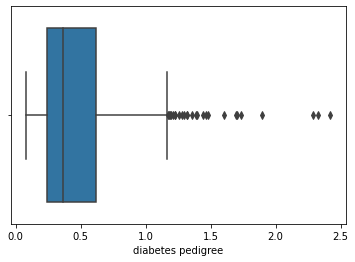

In [32]:
boxplots_before(df,'diabetes pedigree')

## above box plot is before removing outliers 
## below box plot is after perfoming outliers

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


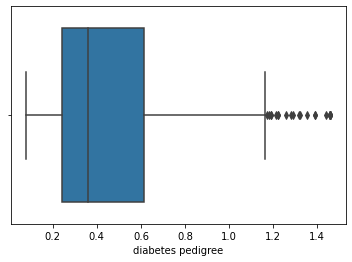

In [33]:
remove_outliers(df,'diabetes pedigree')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


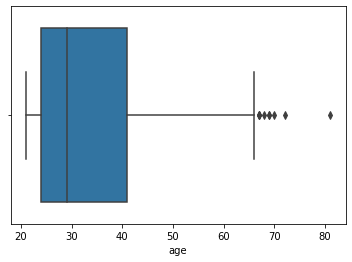

In [34]:
boxplots_before(df,'age')

## above box plot is before removing outliers 
## below box plot is after perfoming outliers

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


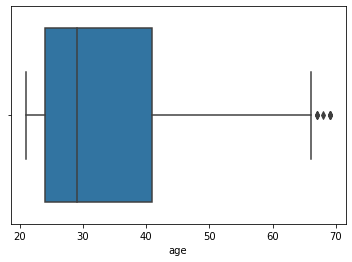

In [35]:
remove_outliers(df,'age')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


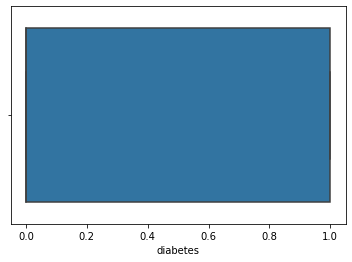

In [36]:
boxplots_before(df,'diabetes')

## above box plot is before removing outliers 
## below box plot is after perfoming outliers

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


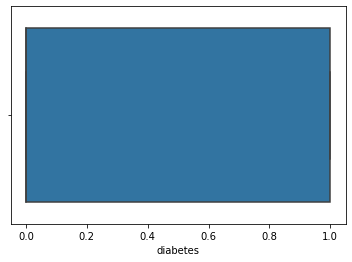

In [37]:
remove_outliers(df,'diabetes')

###  Mostly we cleared outliers like upper bound and lower bound 
1. lets see how outliers will change standard normal distribution

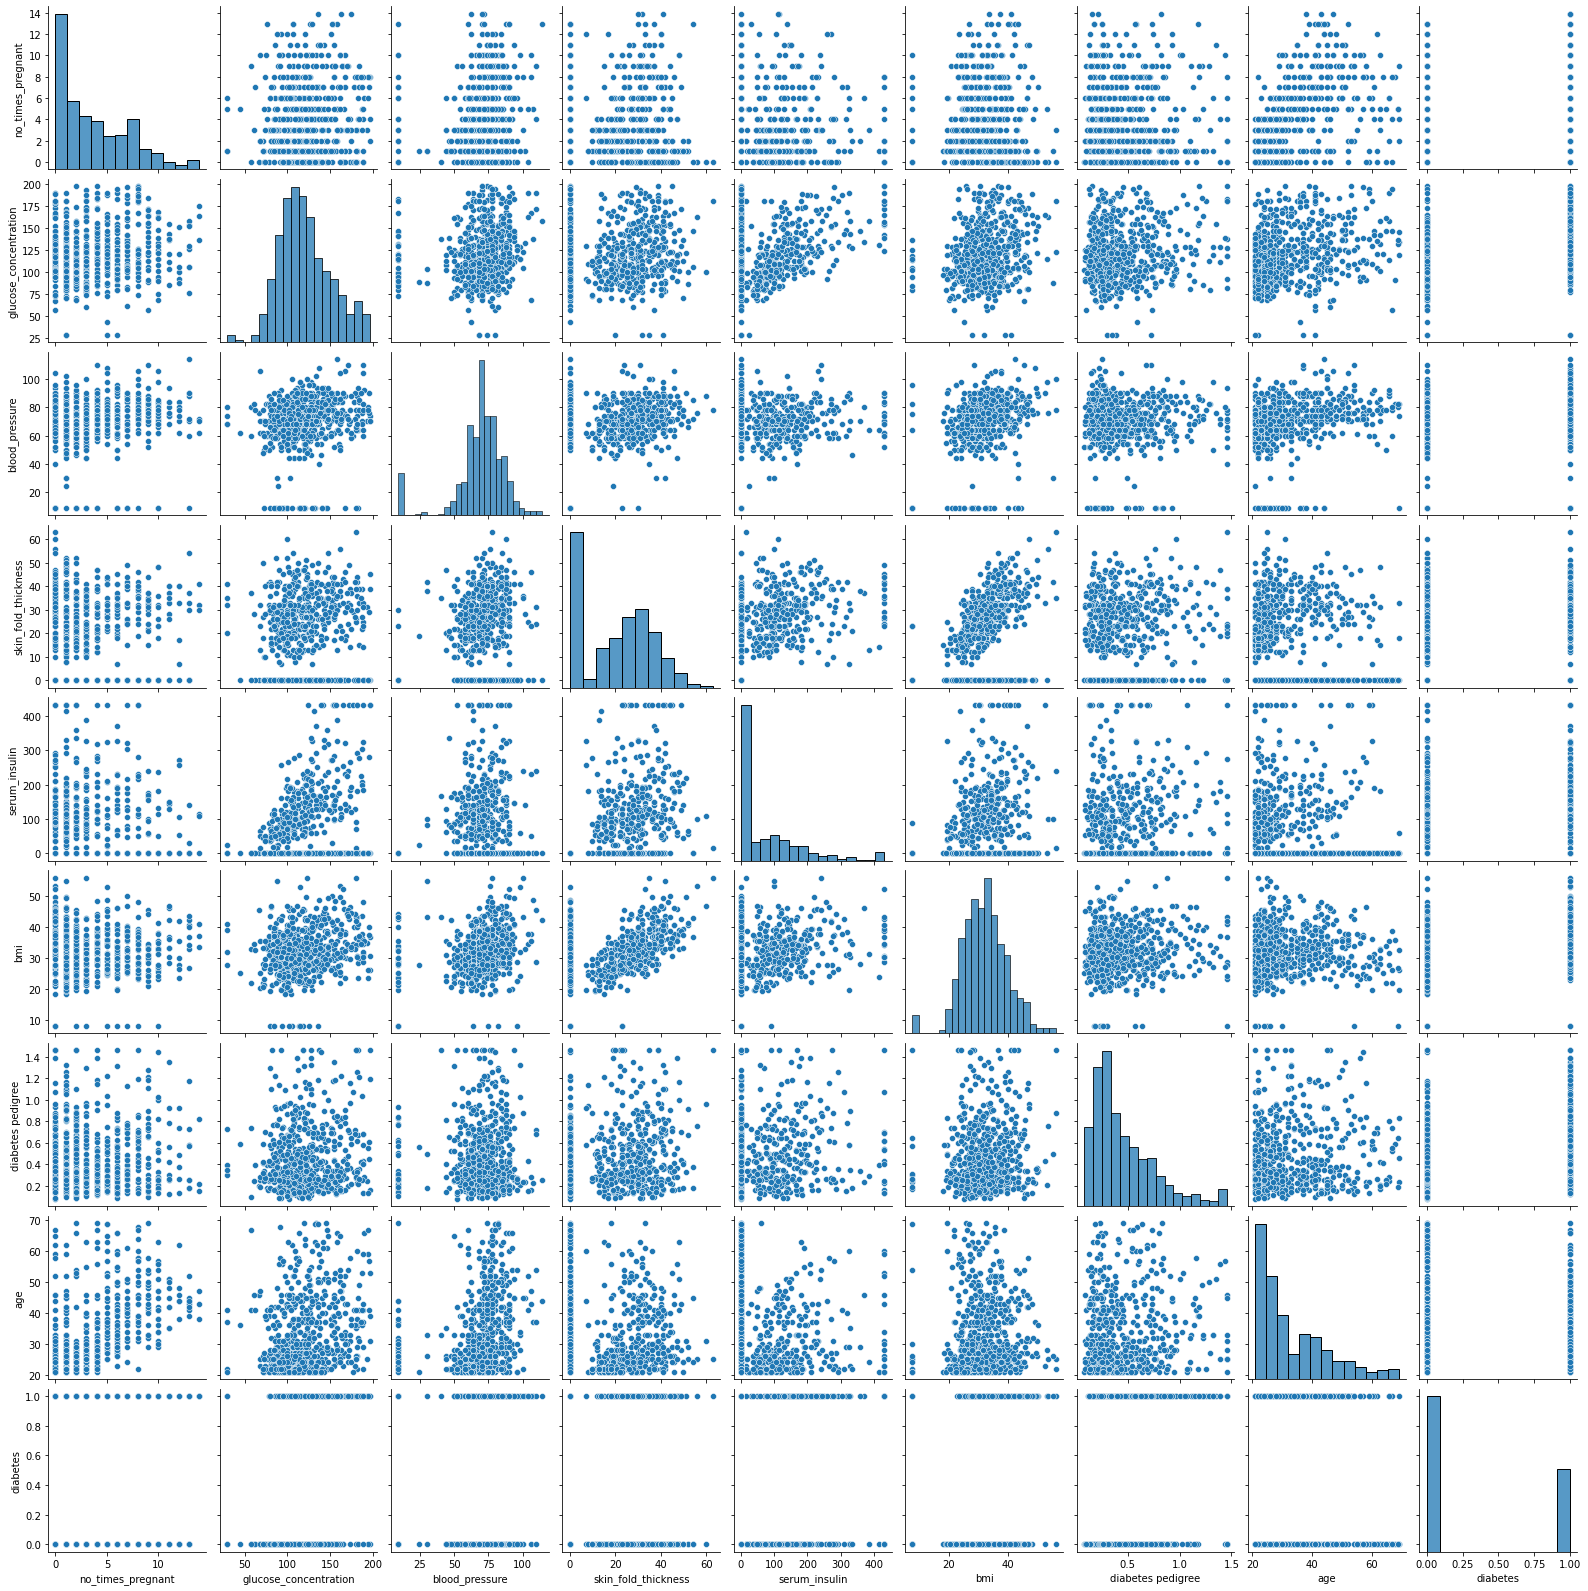

In [38]:
#this pairplot for to see after cleaning outliers  how features looks in std normal distribution

sns.pairplot(df)

In [39]:
# okay most of the data are unique we dont need to drop any data :P
def print_columns(data):
    for col in data.columns:
        print(col)
       

In [40]:
print_columns(df)

no_times_pregnant
glucose_concentration
blood_pressure
skin_fold_thickness
serum_insulin
bmi
diabetes pedigree
age
diabetes


# okay i thing all datas are cleaned and analysis next is traning model and hyper parameter tunning and selecting suitable model

In [41]:
df.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,2.0,112.0,68.0,22,94.0,34.1,0.315,26.0,0.0
1,11.0,143.0,94.0,33,146.0,36.6,0.254,51.0,1.0
2,2.0,93.0,64.0,32,160.0,38.0,0.674,23.0,1.0
3,1.0,120.0,80.0,48,200.0,38.9,1.162,41.0,0.0
4,3.0,128.0,72.0,25,190.0,32.4,0.549,27.0,1.0


In [42]:
X=df.drop(columns='diabetes',axis=1)

In [43]:
y=df['diabetes']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=7)

In [45]:
## import necesasry model

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [46]:
## first we have taken logistic regression to train our model we know that logistic regression are sensitive for outliers
## we always take care of outliers


lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred=lr.predict(X_train)

In [48]:
def model_param(y_train,y_pred):
    print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
    print("F1 Score:-", metrics.f1_score(y_train, y_pred))
    print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
    print("Log Loss:-", metrics.log_loss(y_train, y_pred))
    print("Precision Score:-", metrics.precision_score(y_train, y_pred))
    print("Recall Score:-", metrics.recall_score(y_train, y_pred))
    print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

In [49]:
model_param(y_train,y_pred)

# accuracy score sees true postive and true negative
# F1 Score sees false postive and false ngeative

Accuracy Score:- 0.7832167832167832
F1 Score:- 0.6463878326996197
Average Precision Score:- 0.5651509829592021
Log Loss:- 7.48748669427613
Precision Score:- 0.7264957264957265
Recall Score:- 0.5821917808219178
ROC-AUC Score:- 0.7345587879374605


### our model acc will come around 78 lets see confusion matrix

In [50]:
y_test_pred=lr.predict(X_test)

In [51]:
def cm(y_test,y_test_pred):
    cfm=confusion_matrix(y_test, y_test_pred)
    trueNegative=cfm[0][0]
    falsePossitive=cfm[0][1]
    false_negative=cfm[1][0]
    truePositive=cfm[1][1]
    print("Confusion Matrix", cfm)
    print("true negative", trueNegative)
    print("False Positive", falsePossitive)
    print("false Negative", false_negative)
    print("True Positive", truePositive)
    print("correct prediction",round((trueNegative+truePositive)/len(y_test_pred)*100, 1),'%')
    cfm_df=pd.DataFrame(cfm, range(2), range(2))
    plt.figure(figsize=(10,10))
    sns.heatmap(cfm_df, cmap='Reds', annot=True)
    plt.show()
    ## getting accuracy using CM

    acc=(truePositive+trueNegative)/(falsePossitive+false_negative+truePositive+trueNegative)
    
    print('Accuracy score using CM',acc)

# True Positive (TP) 

    The predicted value matches the actual value
    The actual value was positive and the model predicted a positive value


# True Negative (TN) 

    The predicted value matches the actual value
    The actual value was negative and the model predicted a negative value


# False Positive (FP) – Type 1 error

    The predicted value was falsely predicted
    The actual value was negative but the model predicted a positive value
    Also known as the Type 1 error


# False Positive (FP) – Type 1 error

    The predicted value was falsely predicted
    The actual value was negative but the model predicted a positive value
    Also known as the Type 1 error


Confusion Matrix [[104  13]
 [ 29  39]]
true negative 104
False Positive 13
false Negative 29
True Positive 39
correct prediction 77.3 %


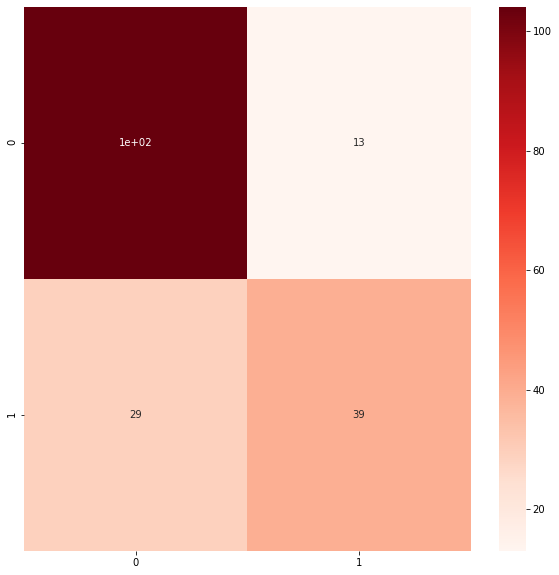

Accuracy score using CM 0.772972972972973


In [52]:
cm(y_test,y_test_pred)

# Cross Table for confusion matrix

In [53]:
y_test_pred=lr.predict(X_test)

In [54]:
pd.crosstab(y_test,y_test_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,104,13,117
1.0,29,39,68
All,133,52,185


In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       117
         1.0       0.75      0.57      0.65        68

    accuracy                           0.77       185
   macro avg       0.77      0.73      0.74       185
weighted avg       0.77      0.77      0.77       185



# ROC-AUC 

In [57]:
y_test_pred_prob=lr.predict_proba(X_test)[:,1]

In [58]:
from sklearn.metrics import roc_curve

In [59]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)

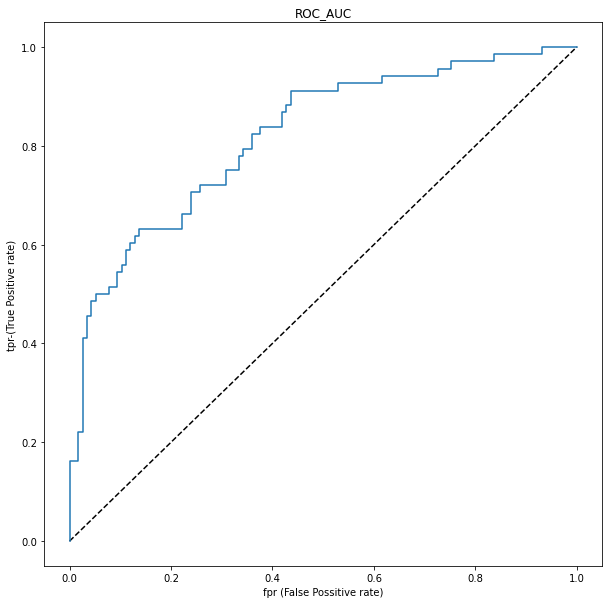

In [60]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

### Lets try few different  algorithms with daibeties dataset

In [62]:

xgb=XGBClassifier()
xgb.fit(X_train, y_train)

[12:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
y_pred=xgb.predict(X_train)

In [64]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


In [65]:
# Predicting the Test data with model 
y_test_pred=xgb.predict(X_test)

In [66]:
## lets evaluate using test dataset

In [67]:
xgb_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",xgb_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.7243243243243244
F1 Score:- 0.6222222222222222
Average Precision Score:- 0.5277222789075291
Log Loss:- 9.521608573384864
Precision Score:- 0.6268656716417911
Recall Score:- 0.6176470588235294
ROC-AUC Score:- 0.7019859225741578


# Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
y_pred=rfc.predict(X_train)


# Model Evaluation

In [71]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


In [72]:
# Predicting the Test data with model 
y_test_pred=rfc.predict(X_test)

In [73]:
rfc_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",rfc_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.745945945945946
F1 Score:- 0.591304347826087
Average Precision Score:- 0.5454859114433583
Log Loss:- 8.774772353121053
Precision Score:- 0.723404255319149
Recall Score:- 0.5
ROC-AUC Score:- 0.6944444444444444


 ## As we saw that our LogisticRegression preform very well

In [74]:
# lets save logistic regression model for our api 